In [23]:
# import libraries 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from scipy.stats import randint as sp_randint
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from datetime import datetime

import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
import pickle

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)




### as the size of files is very large so I tried to make it smaller by changing variable type

In [24]:
# Refer :- https://www.kaggle.com/rinnqd/reduce-memory-usage
def reduce_memory_usage(df):
  
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

## Reading the train file 

In [25]:
import pandas as pd
import numpy as np

# Import train data
df_train =reduce_memory_usage(pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv'))

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%


In [26]:
df_train.shape

(307511, 122)

In [27]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018799,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083008,0.262939,0.139404,0.024704,0.036896,0.972168,0.619141,0.014297,0.000000,0.068970,0.083313,0.125000,0.036896,0.020203,0.018997,0.000000,0.000000,0.025208,0.038300,0.972168,0.634277,0.014397,0.000000,0.068970,0.083313,0.125000,0.037689,0.022003,0.019806,0.0,0.0,0.024994,0.036896,0.972168,0.624512,0.014397,0.000000,0.068970,0.083313,0.125000,0.037506,0.020493,0.019302,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003542,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311279,0.622070,NaN,0.095886,0.052887,0.984863,0.795898,0.060486,0.080017,0.034485,0.291748,0.333252,0.013000,0.077271,0.054901,0.003901,0.009804,0.092407,0.053802,0.984863,0.804199,0.049713,0.080627,0.034485,0.291748,0.333252,0.012802,0.078979,0.055389,0.0,0.0,0.096802,0.052887,0.984863,0.798828,0.060791,0.080017,0.034485,0.291748,0.333252,0.013199,0.078674,0.055786,0.003901,0.010002,reg oper account,block of flats,0.071411,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010033,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,

In [28]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.0,307511.000000,104582.0,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.0,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.0,306490.0,306490.0,306490.0,307510.0,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.0,265992.0,265992.0,265992.0,265992.0,265992.0
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990259e+05,27108.572266,5.383961e+05,0.000000,-16036.995067,63815.045904,NaN,-2994.202373,NaN,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,NaN,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,NaN,0.0,NaN,0.00

### some intial notes :
1- Data is imbalaned (from mean of target column )

2- there is large number of nan columns 

3- there is some outliers in income columns 

### 1- Check For nans :- 

In [29]:
# calculate Nan percent in each column 
nan_percent = (df_train.isna().sum() / len(df_train)) * 100

# Create a DataFrame from the series
nan_percent_df = nan_percent.reset_index()
nan_percent_df.columns = ['Column', 'NaN_Percent']

# Sort the DataFrame by the percentage of NaNs in ascending order
nan_percent_df = nan_percent_df.sort_values(by='NaN_Percent', ascending=False)

nan_percent_df.head(10)

,Column,NaN_Percent
76,COMMONAREA_MEDI,69.872297
48,COMMONAREA_AVG,69.872297
62,COMMONAREA_MODE,69.872297
70,NONLIVINGAPARTMENTS_MODE,69.432963
56,NONLIVINGAPARTMENTS_AVG,69.432963
84,NONLIVINGAPARTMENTS_MEDI,69.432963
86,FONDKAPREMONT_MODE,68.386172
68,LIVINGAPARTMENTS_MODE,68.354953
54,LIVINGAPARTMENTS_AVG,68.354953
82,LIVINGAPARTMENTS_MEDI,68.354953


### Insights :
1- there is large Number of nans in many columns in the data set

2- we will impute important feature from them later 

# 1- Univariate analysis of applicant information

* ### 1.1 Univariate analysis of numerical columns 

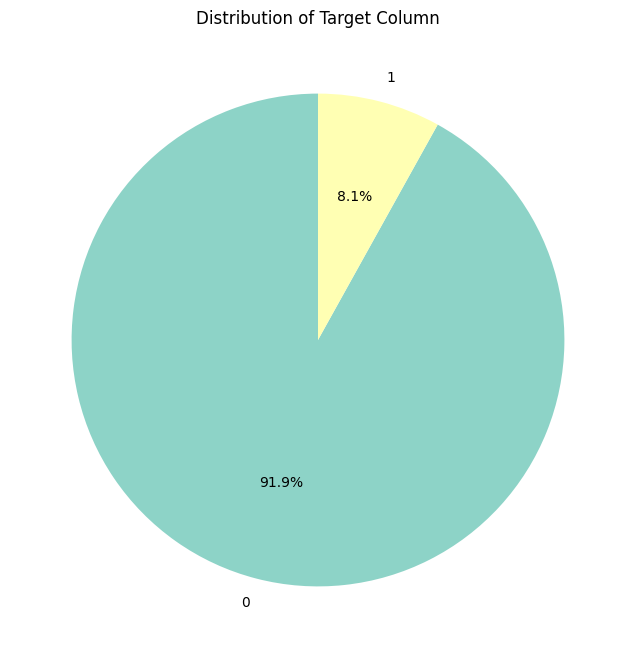

In [30]:
# Distribtion of TARGET
counts_in_Target_column = df_train['TARGET'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts_in_Target_column, labels=counts_in_Target_column.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Distribution of Target Column')
plt.show()

### 1 insights 
##### As expected the data is imbalanced (number of defaulters is very tiny compared to non defaulters) which make us think in another evaluation matrics instead of accuracy 

In [31]:
# implement function that show distribution of continous variables with with respect to target variable 

def plot_target_histograms(df, numerical_column, target_column='TARGET'):
    """
    Visualizes histograms of a numerical column, separated by the target column.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    numerical_column (str): The name of the numerical column to plot.
    target_column (str): The name of the target column (default is 'TARGET').
    """
    df[numerical_column] = df[numerical_column].astype('float32')

    # Split the data into two groups based on the target column
    target_0 = df[df[target_column] == 0]
    target_1 = df[df[target_column] == 1]

    # Set up the matplotlib figure
    plt.figure(figsize=(14, 10))

    # Plot histogram for target = 0
    plt.figure(figsize=(10,3))
    sns.histplot(target_0[numerical_column],kde=True, color='blue', alpha=0.5, label=f'{target_column} = 0')
    
    # Plot histogram for target = 1
    sns.histplot(target_1[numerical_column],kde=True, color='red', alpha=0.5 ,label=f'{target_column} = 1')
    
    plt.title(f'Histogram of {numerical_column}')
    plt.xlabel(numerical_column)
    plt.ylabel('Frequency')
    
    plt.legend()
    plt.show()



In [32]:
# filering numerical columns from the data set 
numerical_df = df_train.select_dtypes(include=['number'])

binary_columns = [col for col in numerical_df.columns if numerical_df[col].nunique() == 2]

non_binary_numerical_columns = [col for col in numerical_df.columns if col not in binary_columns]

print(non_binary_numerical_columns)


['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATI

### 1.1.1 amount credit 

<Figure size 1400x1000 with 0 Axes>

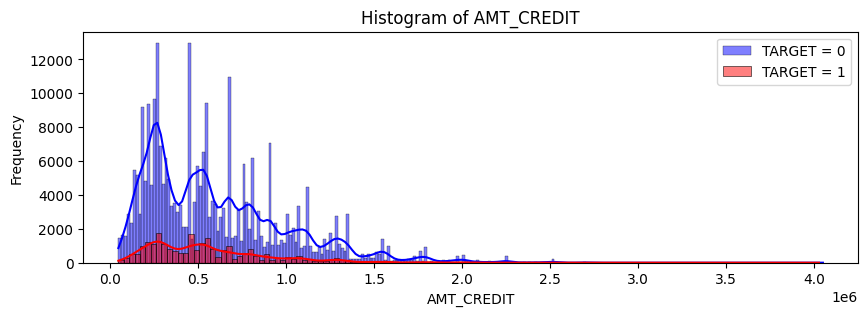

In [33]:
# Distribtion of AMT_CREDIT
plot_target_histograms(df_train, "AMT_CREDIT")

#### Insights 
1- most of amount of credits under 1.5  miliion

2- there is some outliers that need farther transformation 

<Figure size 1400x1000 with 0 Axes>

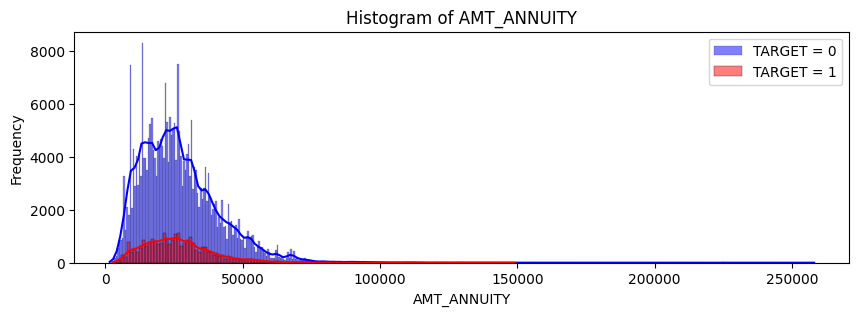

In [34]:
# Distribtion of AMT_ANNUITY
plot_target_histograms(df_train, "AMT_ANNUITY")

###  Observation :
1- the Distribution of AMT_ANNUITY look like  the AMT_CREDIT which indicates there is some relation between them that we will investigate later  

2- large number of outliers that need farther transformation 


<Figure size 1400x1000 with 0 Axes>

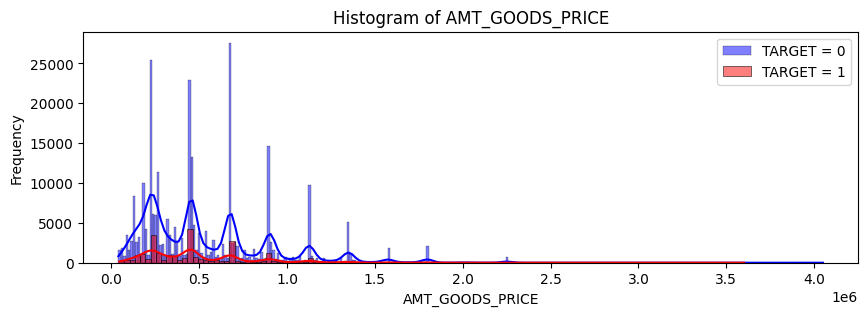

In [35]:
# Distribtion of AMT_GOODS_PRICE
plot_target_histograms(df_train, "AMT_GOODS_PRICE")

### Observation :
1-the Distribution of AMT_GOODS_PRICE look like  the AMT_CREDIT which indicates there is some relation between them that we will investigate later 

<Figure size 1400x1000 with 0 Axes>

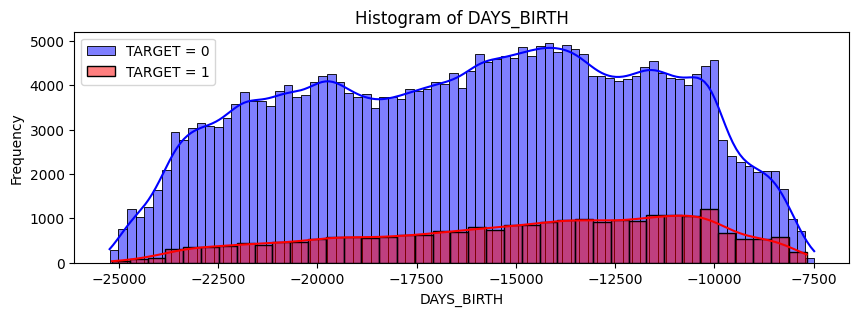

In [36]:
# Distribtion of DAYS_BIRTH
plot_target_histograms(df_train, "DAYS_BIRTH")

###  Observation :
1- it seems that age  is important feature as younger people are more probable to be not  capable of repayment
but older people tend tp be more probable of repayment 

<Figure size 1400x1000 with 0 Axes>

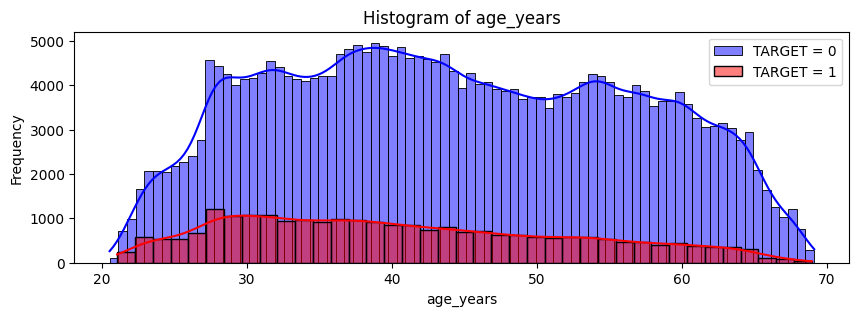

In [37]:
### lets convert this birth_days to real age 
df_train["age_years"]=df_train["DAYS_BIRTH"]/-365
plot_target_histograms(df_train, "age_years")

### Insights  :
1- people of age 20:35 have higher probabilty of not repayemnt 

2- people of age 55:70 have higher probabilty of  repayemnt 


<Figure size 1400x1000 with 0 Axes>

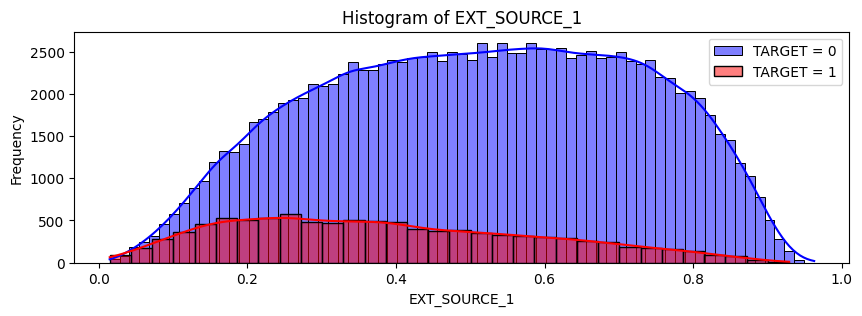

In [38]:
# Distribtion of EXT_SOURCE_1
plot_target_histograms(df_train, "EXT_SOURCE_1")

### insights:
1- this external score is very important in seperating the 2 classes as increasing the score means higher probabilty of repayment 

<Figure size 1400x1000 with 0 Axes>

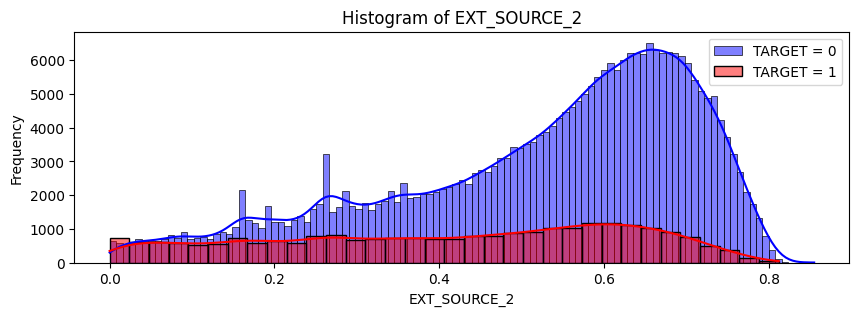

In [39]:
# Distribtion of EXT_SOURCE_2
plot_target_histograms(df_train, "EXT_SOURCE_2")


### insights:
1- this external score is also very important in seperating the 2 classes as increasing the score means higher probabilty of repayment 

<Figure size 1400x1000 with 0 Axes>

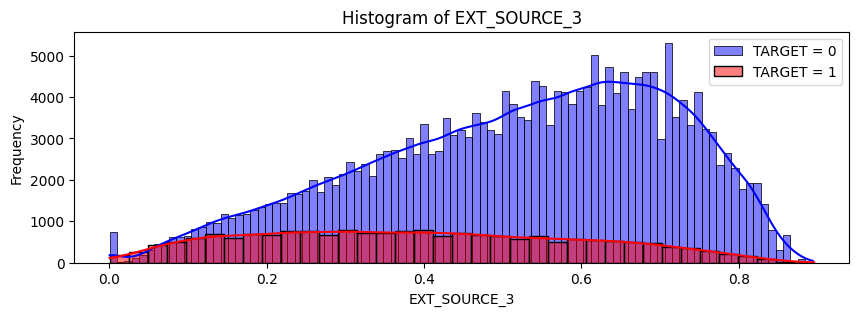

In [40]:
# Distribtion of EXT_SOURCE_3
plot_target_histograms(df_train, "EXT_SOURCE_3")

### insights:
1- this external score may be the most impratnt fearure in seperating the classes  as increasing the score means higher probabilty of repayment 

In [41]:
# replace positive values with 0 in this column  
column_name = 'DAYS_EMPLOYED'
df_train.loc[df_train[column_name] > 0, column_name] = 0

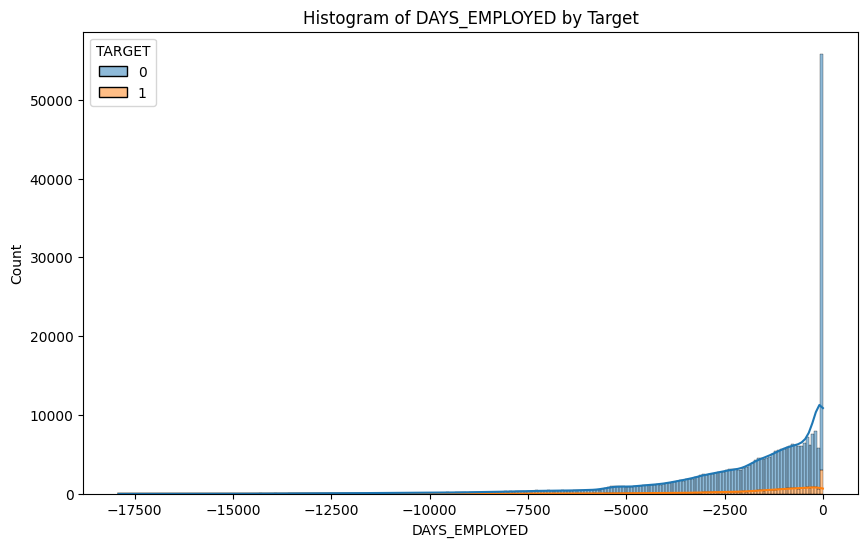

In [42]:
#DAYS_EMPLOYED
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x="DAYS_EMPLOYED", hue='TARGET', multiple='stack', kde=True)
plt.title(f'Histogram of DAYS_EMPLOYED by Target')
plt.xlabel("DAYS_EMPLOYED")
plt.ylabel('Count')
plt.show()

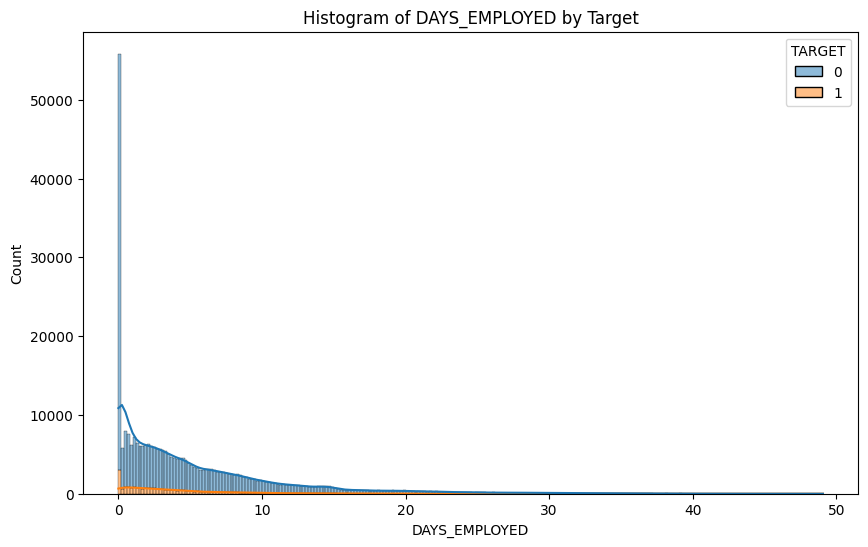

In [43]:
### trasnform this emplyment to years 
df_train["DAYS_EMPLOYED_Years"]=df_train["DAYS_EMPLOYED"]/-365
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x="DAYS_EMPLOYED_Years", hue='TARGET', multiple='stack', kde=True)
plt.title(f'Histogram of DAYS_EMPLOYED by Target')
plt.xlabel("DAYS_EMPLOYED")
plt.ylabel('Count')
plt.show()

### Insights :
1- most people who take loans are newely empleyed (90% of them between 0 and 10 years of employment )

2- It also seems important Feature as people with large number of emplyment years tend to pay their debts back 

<Figure size 1400x1000 with 0 Axes>

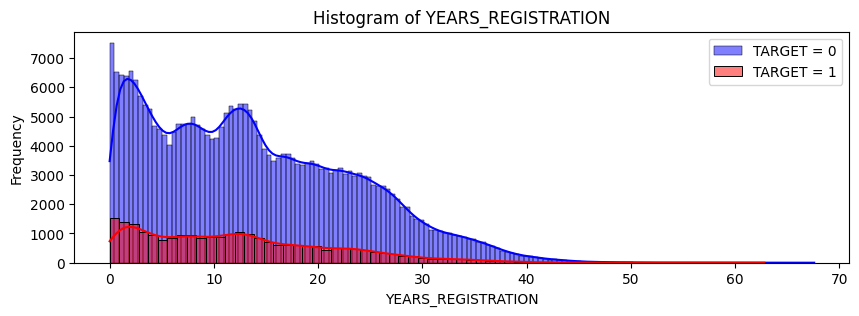

In [44]:
# Distribtion of DAYS_REGISTRATION
df_train["YEARS_REGISTRATION"]=df_train["DAYS_REGISTRATION"] / -365
plot_target_histograms(df_train, "YEARS_REGISTRATION")

### Insights 
1- people with low registrations years tend to be  take higher number of  loans 

* ### 1.1 Univariate analysis of Categorical columns  with respect to target column

In [45]:
# select categorical columns in train file 
categorical_columns = df_train.select_dtypes(include=['object',"category"]).columns.tolist()+[col for col in df_train.columns if df_train[col].nunique() == 2 and df_train[col].isin([0, 1]).all()]
categorical_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCU

### Note:As there is large number of categorical columns I used Chi-square test to filter features that seems to affect the output 

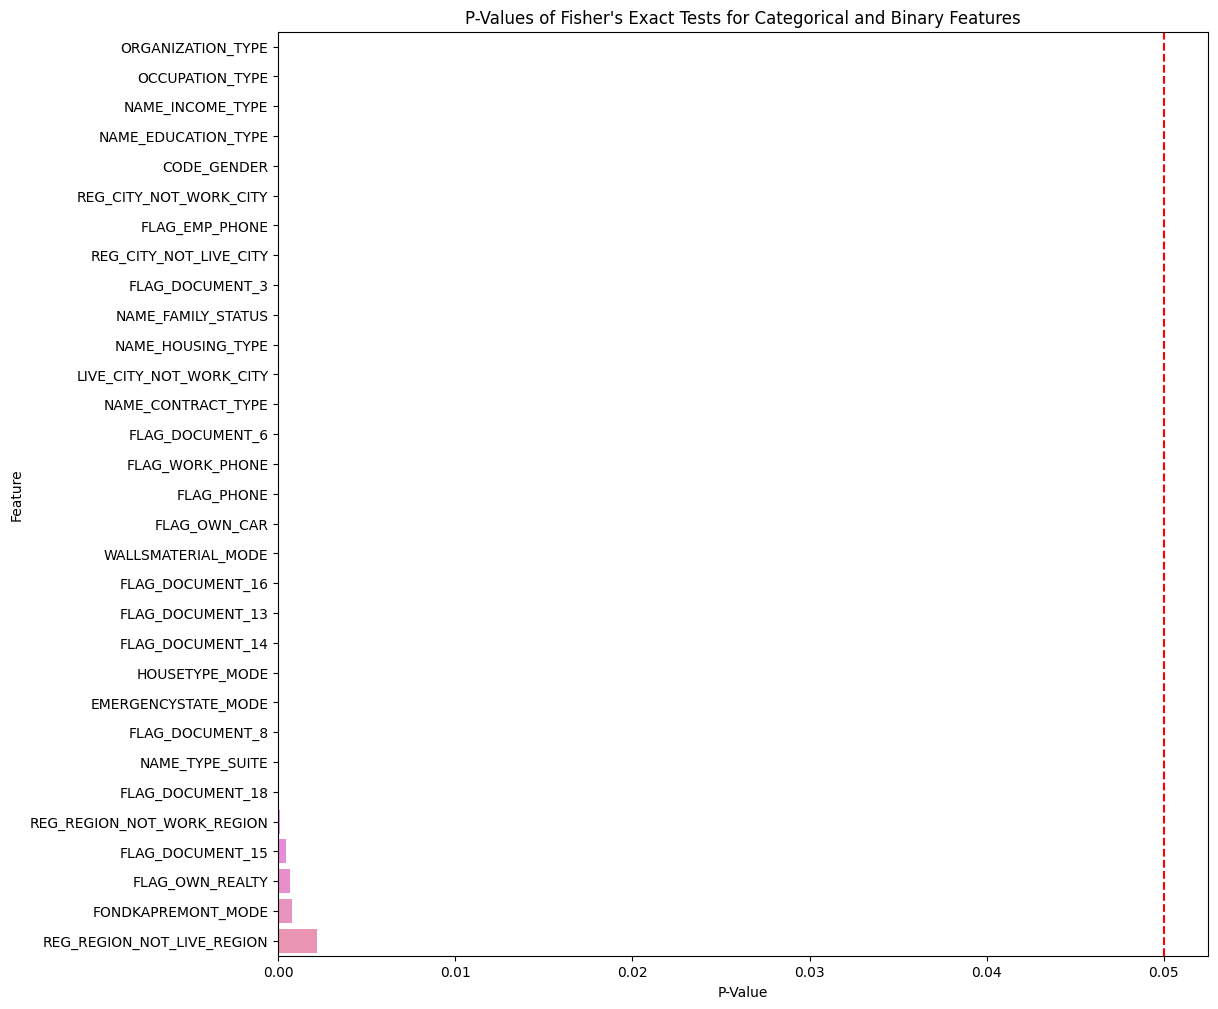

In [46]:
from scipy.stats import fisher_exact
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()

# Identify columns with only 0 or 1 values
binary_columns = [col for col in df_train.columns if df_train[col].nunique() == 2 and df_train[col].isin([0, 1]).all()]

# Combine both lists
relevant_columns = categorical_columns + binary_columns
relevant_columns.remove("TARGET")
# Store the results
chi2_results = []

for column in relevant_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df_train[column], df_train['TARGET'])

    # Perform Chi-Square test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Store the results
    chi2_results.append((column, chi2, p))

# Create a DataFrame for the results
chi2_df = pd.DataFrame(chi2_results, columns=['Feature', 'Chi2', 'p-value'])

# Sort by p-value
chi2_df = chi2_df.sort_values(by='p-value')


# Filter features with significant p-value (e.g., p < 0.05)
significant_features = chi2_df[chi2_df['p-value'] < 0.01]
plt.figure(figsize=(12, 12))
sns.barplot(x='p-value', y='Feature', data=significant_features)
plt.axvline(x=0.05, color='red', linestyle='--')  # Add a red line for the 0.05 significance level
plt.title('P-Values of Fisher\'s Exact Tests for Categorical and Binary Features')
plt.xlabel('P-Value')
plt.ylabel('Feature')
plt.show()


#### lets visualize the columns that chisqaure said they are important 

In [47]:
### Impement functions that visualize the columns that chisqaure said they are important with respect to target column 
def catagorical_variables_target_relation(data, col1, col2='TARGET'):
    
    """
    Visualizes the relationship between a categorical variable and the target variable.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    col1 (str): The name of the categorical column.
    col2 (str): The name of the target column (default is 'TARGET').

    Returns:
    None
    """
    # Count number of zeros in dataframe 
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Percent_not_repaying_loan'] = pd.DataFrame(data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)    
    temp=temp.head()
    ind = np.arange(temp.shape[0])

    plt.figure(figsize=(10, 6))
    p1 = plt.bar(ind, temp["total"].values,color='blue')
    p2 = plt.bar(ind, temp[col2].values,color='red')

    plt.ylabel('Loans')
    plt.title('Number of loans Repayed vs non repayed')
    plt.xticks(ticks=ind,rotation=90,labels= list(temp[col1].values))
    plt.legend((p1[0], p2[0]), ('0 Target', '1 Target'))
    plt.show()
    print(temp.head(5))


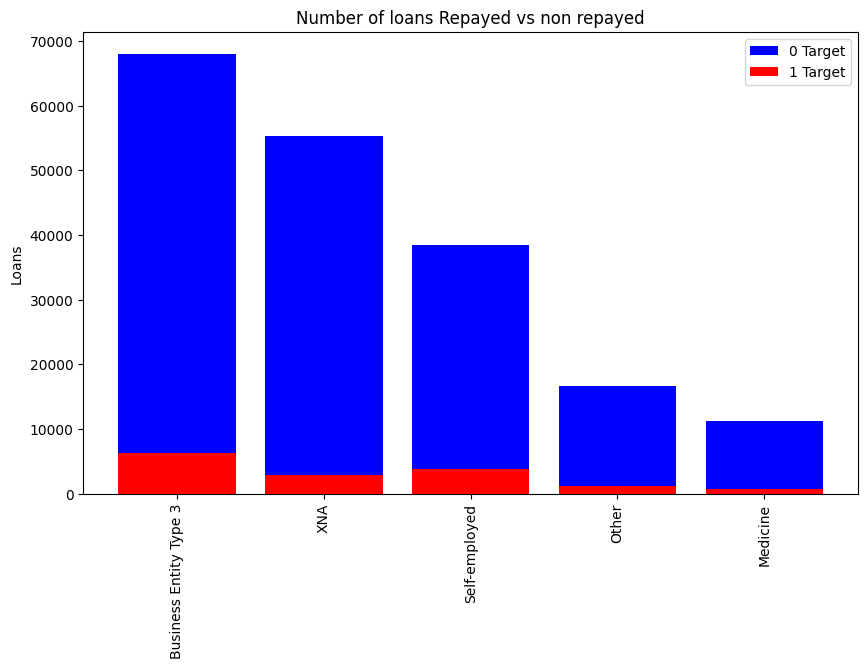

         ORGANIZATION_TYPE  TARGET  total  Percent_not_repaying_loan
5   Business Entity Type 3    6323  67992                   0.092996
57                     XNA    2990  55374                   0.053996
42           Self-employed    3908  38412                   0.101739
33                   Other    1275  16683                   0.076425
30                Medicine     737  11193                   0.065845


In [48]:
catagorical_variables_target_relation(df_train, "ORGANIZATION_TYPE", 'TARGET')

### observations
1- the people who are self employed or work in business entity have higher rate of about 10 % of not repaying their loan 

2- People work in medicine have less rate of not paying their depts of about 5 % 

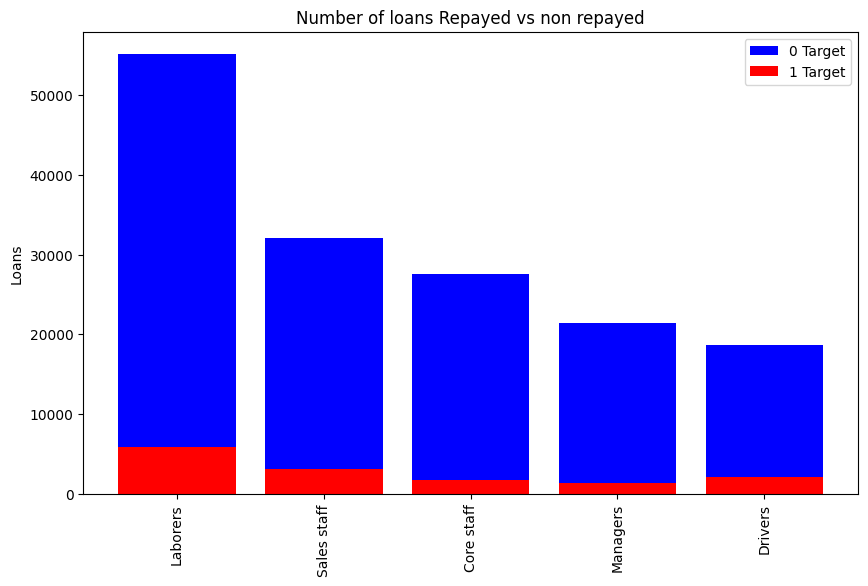

   OCCUPATION_TYPE  TARGET  total  Percent_not_repaying_loan
8         Laborers    5838  55186                   0.105788
14     Sales staff    3092  32102                   0.096318
3       Core staff    1738  27570                   0.063040
10        Managers    1328  21371                   0.062140
4          Drivers    2107  18603                   0.113261


In [49]:
catagorical_variables_target_relation(df_train, "OCCUPATION_TYPE", 'TARGET')

### observations
1- the people who are laborers or drivers  have higher rate of about 11 % of not repaying their loan  while managers and staff has lower rate of 5 % of not repaying 


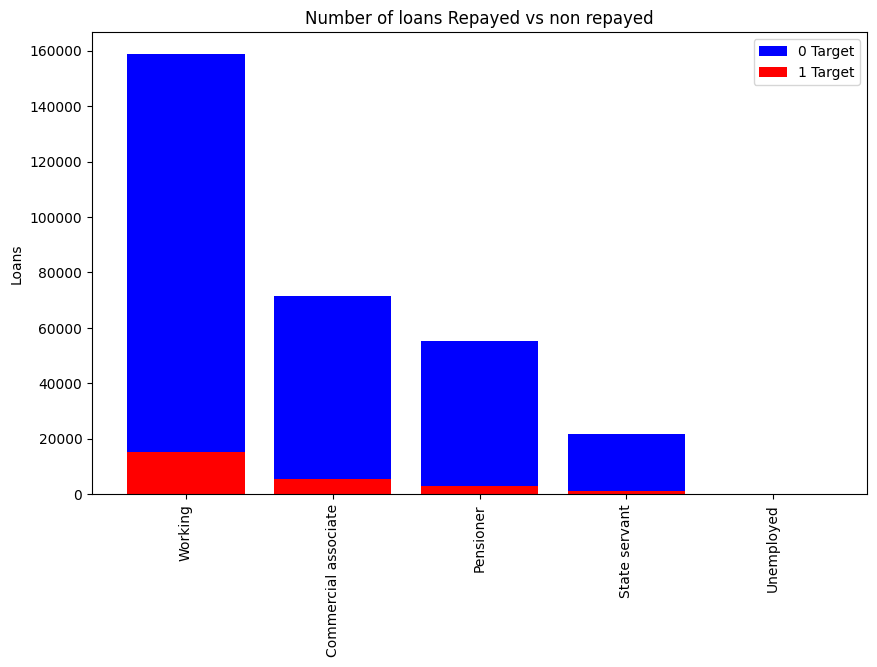

       NAME_INCOME_TYPE  TARGET   total  Percent_not_repaying_loan
7               Working   15224  158774                   0.095885
1  Commercial associate    5360   71617                   0.074843
3             Pensioner    2982   55362                   0.053864
4         State servant    1249   21703                   0.057550
6            Unemployed       8      22                   0.363636


In [50]:
catagorical_variables_target_relation(df_train, "NAME_INCOME_TYPE", 'TARGET')

### observations
1- having Income type from working  give you higher rate of not repaying your loans of about 9.5 % 

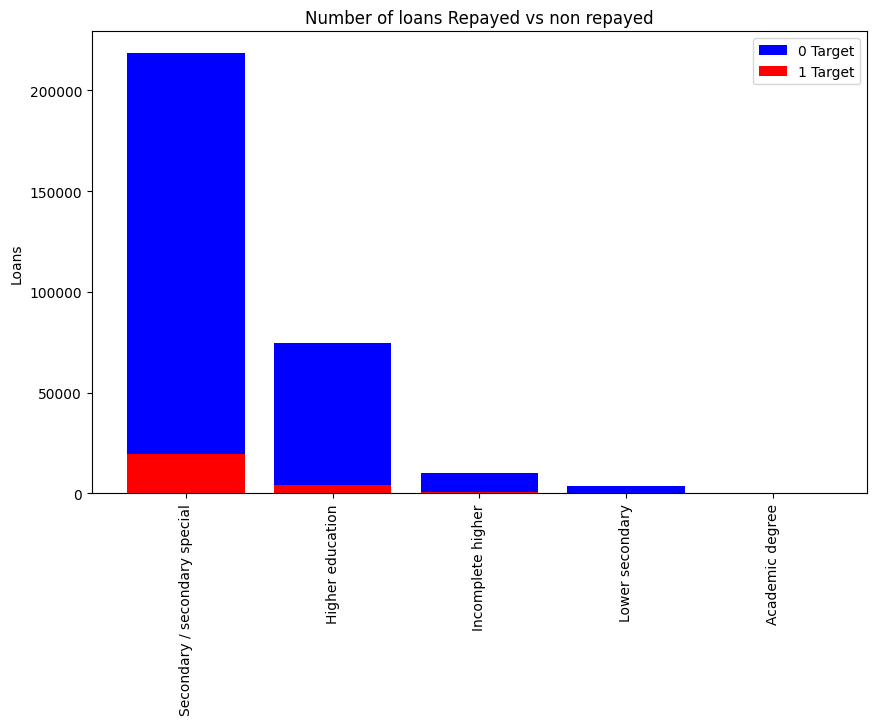

             NAME_EDUCATION_TYPE  TARGET   total  Percent_not_repaying_loan
4  Secondary / secondary special   19524  218391                   0.089399
1               Higher education    4009   74863                   0.053551
2              Incomplete higher     872   10277                   0.084850
3                Lower secondary     417    3816                   0.109277
0                Academic degree       3     164                   0.018293


In [51]:
catagorical_variables_target_relation(df_train, "NAME_EDUCATION_TYPE", 'TARGET')

### Observayions 
1- People with higher education and academic degree has less percentage of not paying their loans Despite People with  Lower secondary have higher probablity of not repaying 

2- most of people who take loans have at east secondary school   


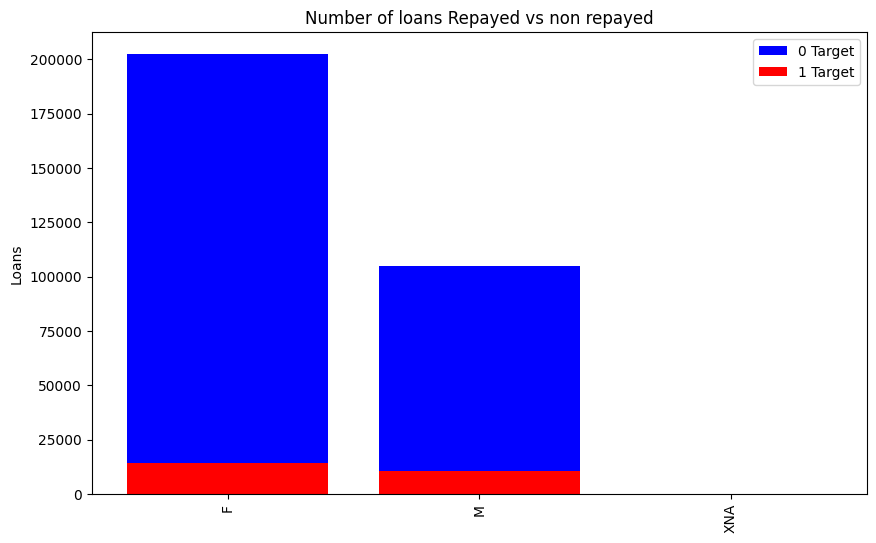

  CODE_GENDER  TARGET   total  Percent_not_repaying_loan
0           F   14170  202448                   0.069993
1           M   10655  105059                   0.101419
2         XNA       0       4                   0.000000


In [52]:
catagorical_variables_target_relation(df_train, "CODE_GENDER", 'TARGET')

### Observations :
1- men tend to repay their debts most probable than women 

2- It's notable that Women tend to take on debt twice as often as men, a surprising observation from our analysis

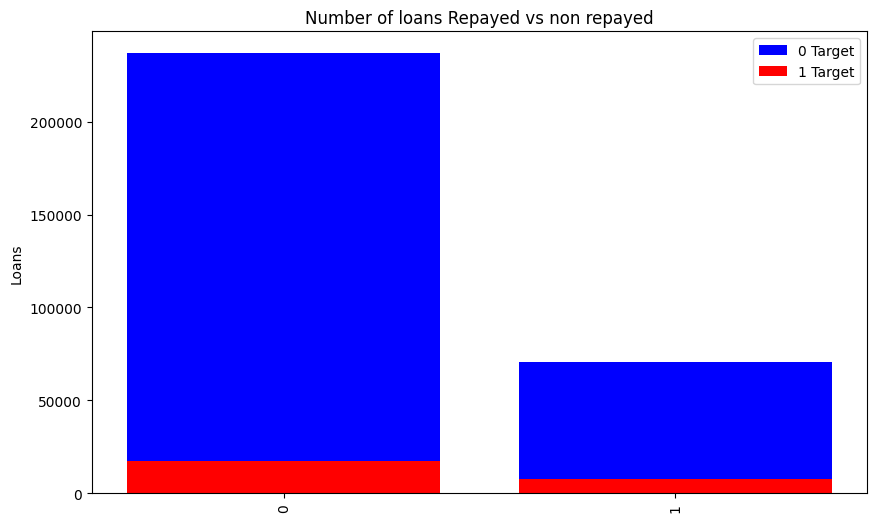

   REG_CITY_NOT_WORK_CITY  TARGET   total  Percent_not_repaying_loan
0                       0   17305  236644                   0.073127
1                       1    7520   70867                   0.106114


In [53]:
catagorical_variables_target_relation(df_train, "REG_CITY_NOT_WORK_CITY", 'TARGET')

### Observations 
1- those who have REG_CITY_NOT_WORK_CITY are more probable of not repaying their dept 

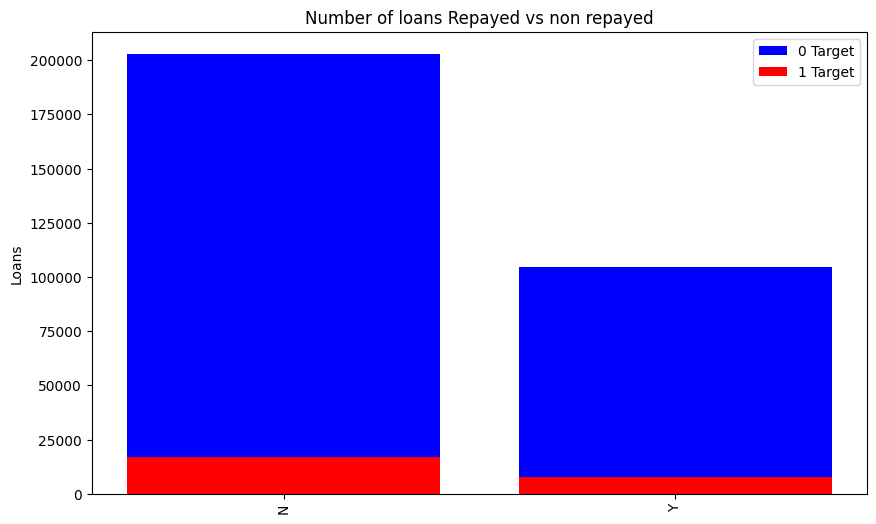

  FLAG_OWN_CAR  TARGET   total  Percent_not_repaying_loan
0            N   17249  202924                   0.085002
1            Y    7576  104587                   0.072437


In [54]:
catagorical_variables_target_relation(df_train, "FLAG_OWN_CAR", 'TARGET')

### Insights 
1-More people who takes loans have nor car 

2- People with a car tend to make repayment (not defaulters) more than people without a car 


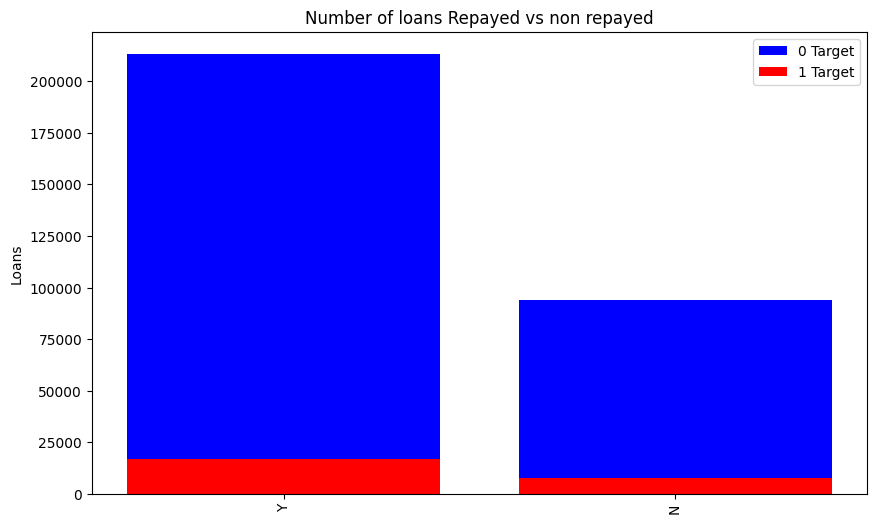

  FLAG_OWN_REALTY  TARGET   total  Percent_not_repaying_loan
1               Y   16983  213312                   0.079616
0               N    7842   94199                   0.083249


In [55]:
catagorical_variables_target_relation(df_train, "FLAG_OWN_REALTY", 'TARGET')

### Insights
1-More people who takes loans  have a reality 

2- People with a reality tend to make repayment (not defaulters) more than people without a realty

## 2.1 Bivariate analysis of numerical columns :


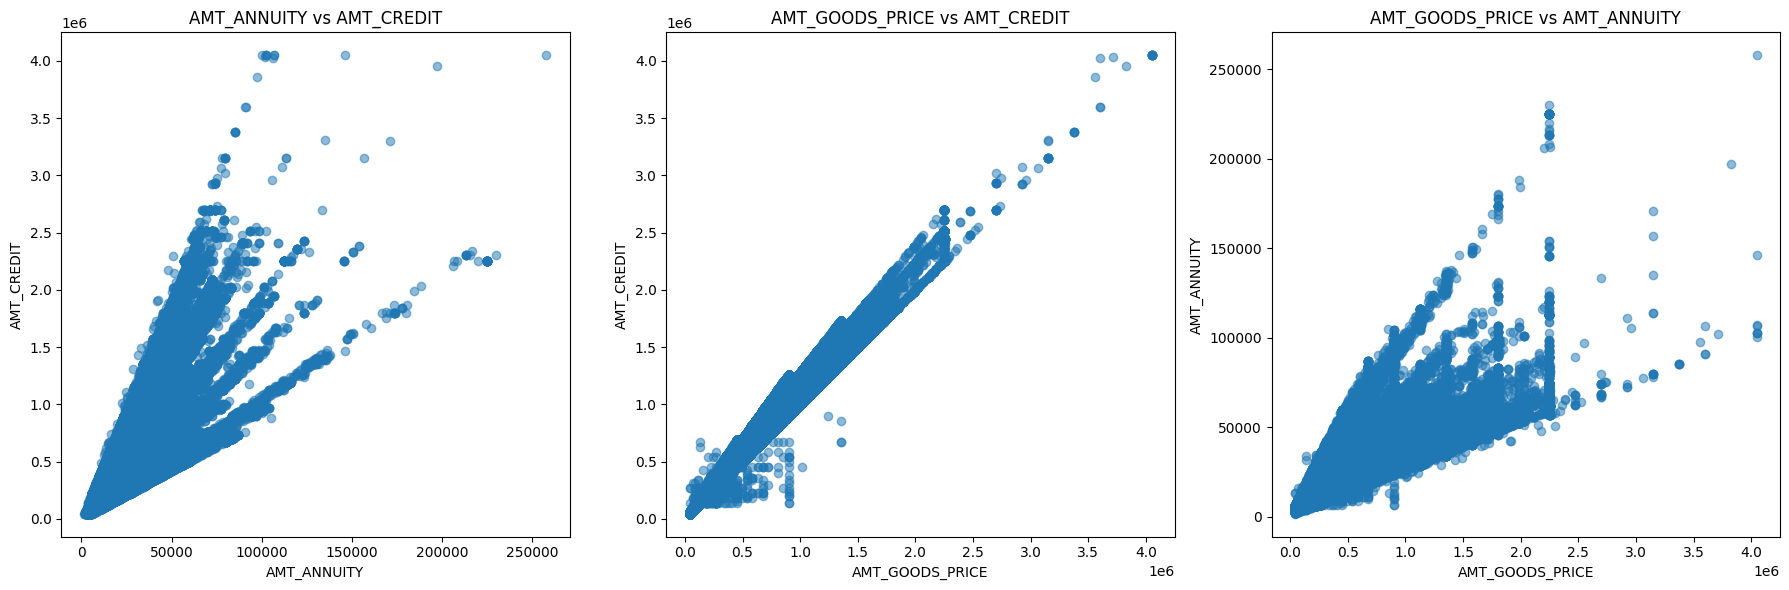

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First scatter plot: AMT_ANNUITY vs AMT_CREDIT
axes[0].scatter(df_train["AMT_ANNUITY"], df_train["AMT_CREDIT"], alpha=0.5)
axes[0].set_title("AMT_ANNUITY vs AMT_CREDIT")
axes[0].set_xlabel("AMT_ANNUITY")
axes[0].set_ylabel("AMT_CREDIT")

# Second scatter plot: AMT_GOODS_PRICE vs AMT_CREDIT
axes[1].scatter(df_train["AMT_GOODS_PRICE"], df_train["AMT_CREDIT"], alpha=0.5)
axes[1].set_title("AMT_GOODS_PRICE vs AMT_CREDIT")
axes[1].set_xlabel("AMT_GOODS_PRICE")
axes[1].set_ylabel("AMT_CREDIT")

# Third scatter plot: AMT_GOODS_PRICE vs AMT_ANNUITY
axes[2].scatter(df_train["AMT_GOODS_PRICE"], df_train["AMT_ANNUITY"], alpha=0.5)
axes[2].set_title("AMT_GOODS_PRICE vs AMT_ANNUITY")
axes[2].set_xlabel("AMT_GOODS_PRICE")
axes[2].set_ylabel("AMT_ANNUITY")

plt.tight_layout()
plt.show()


### insights 
1- It seems that the 3 featues are very corellated and it make sense 

In [57]:
### lets see why female is going to repay less than men ?
def plot_box_with_two_categorical(df, numerical_column, cat_col1, cat_col2):
    """
    Creates a box plot of a numerical column with respect to two categorical columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    numerical_column (str): The name of the numerical column to plot.
    cat_col1 (str): The name of the first categorical column.
    cat_col2 (str): The name of the second categorical column.

    Returns:
    None
    """
    plt.figure(figsize=(14, 10))
    sns.boxplot(data=df, x=cat_col1, y=numerical_column, hue=cat_col2)
    plt.title(f'Box Plot of {numerical_column} with respect to {cat_col1} and {cat_col2}')
    plt.xlabel(cat_col1)
    plt.ylabel(numerical_column)
    plt.legend(title=cat_col2)
    plt.show()


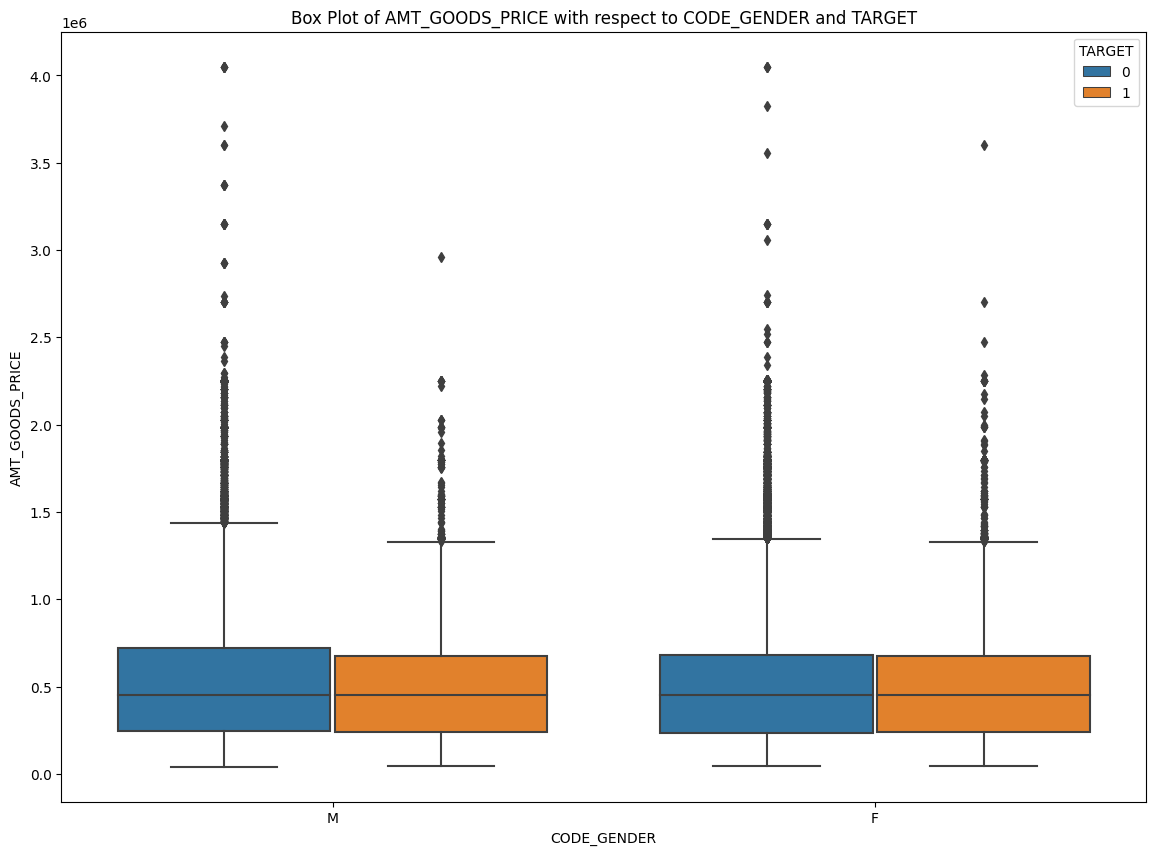

In [58]:
# replace XNA with males 
df_train["CODE_GENDER"]=df_train["CODE_GENDER"].str.replace("XNA","M")
plot_box_with_two_categorical(df_train, "AMT_GOODS_PRICE", "CODE_GENDER", "TARGET")

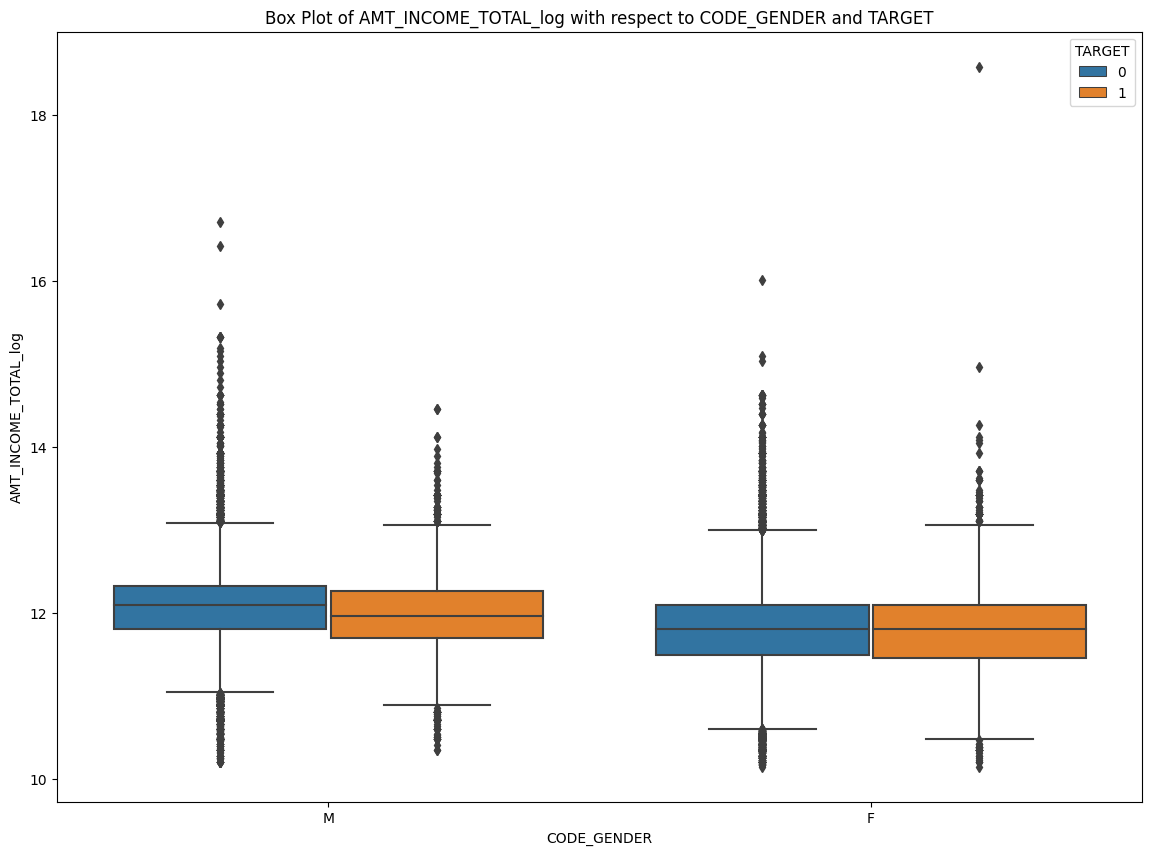

In [59]:
df_train['AMT_INCOME_TOTAL_log'] = np.log(df_train['AMT_INCOME_TOTAL'] + 1)
plot_box_with_two_categorical(df_train, "AMT_INCOME_TOTAL_log", "CODE_GENDER", "TARGET")

### Insights :
1-  I expect Women are defualters more than men becuase they Buy more goods But It was wrong and the True reason is that Annual income of men is higher than women that makes women defaulters more tham men 
   
2- Total income of defaulter men is less than not Defaulters that make this AMT_INCOME_TOTAL important feature 

# 2- Preprocessing Data


###  2.1- create new feature that represent AMT_ANNUITY and AMT_CREDIT

In [60]:
df_train['RATE_OF_LOAN'] = df_train['AMT_ANNUITY'] / df_train['AMT_CREDIT'].round(6)

### 2.2 Apply log tranform to columns with income and prices 

In [61]:
df_train['AMT_INCOME_TOTAL'] = np.log(df_train['AMT_INCOME_TOTAL'] + 1)
df_train['AMT_CREDIT'] = np.log(df_train['AMT_CREDIT'] + 1)
df_train['AMT_ANNUITY'] = np.log(df_train['AMT_ANNUITY'] + 1)
df_train['AMT_GOODS_PRICE'] = np.log(df_train['AMT_GOODS_PRICE'] + 1)

### 2.3- convert DAYS_BIRTH to be age column

In [62]:
df_train["AGE_YEARS"]=df_train["DAYS_BIRTH"]/-365
df_train["YEARS_EMPLOYED"]=df_train["DAYS_EMPLOYED"]/-365
df_train["YEARS_REGISTRATION"]=df_train["DAYS_REGISTRATION"] / -365

### 2.4 Selecting the most import features to work with them 

In [63]:
selected_columns = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'FLAG_OWN_CAR','FLAG_OWN_REALTY',"NAME_INCOME_TYPE",
                    "REG_CITY_NOT_WORK_CITY",
                     'CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE_YEARS',
                    'YEARS_EMPLOYED','YEARS_REGISTRATION',
                   'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',"RATE_OF_LOAN","TARGET"]

In [64]:
len(selected_columns)

19

### 4.5- impute Numerical values with mean and catagorical values with mode 

In [65]:
catagorical_columns=['CODE_GENDER',  'CNT_CHILDREN','NAME_EDUCATION_TYPE',  'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',"NAME_INCOME_TYPE","REG_CITY_NOT_WORK_CITY"]
numerical_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE_YEARS',
                    'YEARS_EMPLOYED','YEARS_REGISTRATION',
                   'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',"RATE_OF_LOAN"]


In [66]:
len(catagorical_columns)+len(numerical_columns)

18

### 3- Modeling 

In [67]:
df_train_selected_column=df_train[selected_columns]
X = df_train_selected_column.drop(columns=["TARGET"])  
y = df_train_selected_column["TARGET"]

### 3.1 Apply XGboost model to data

##### Build the model 

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data: impute missing values with most frequent value (mode), then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, catagorical_columns)
    ])
# Create a pipeline that first applies the preprocessing steps, then fits the random forest model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(objective='binary:logistic',eval_metric = 'auc',\
                         min_child_weight=10, max_depth=3, n_jobs=-1))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'AGE_YEARS',
                                                   'YEARS_EMPLOYED',
                                                   'YEARS_REGISTRATION',
                                                   'EXT_SOURCE_1',
                                                   'EXT_SOURCE_2',
                                                   'EXT_SOURCE_3',
                                                   'RATE_OF_LOAN']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   O...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=10, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None, random_state=None, ...))])

#### Evaluate the model 

AUC: 0.7627781784214192
Precision: 0.2882205513784461
Recall: 0.3020812285310164


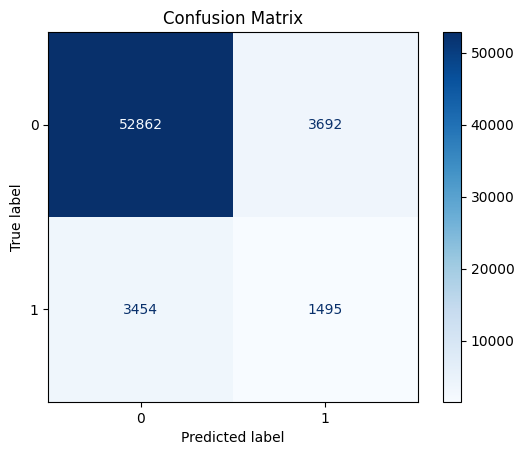

In [69]:
# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc}')
# Calculate precision and recall
threshold = 0.2
y_pred = (y_pred_prob >= threshold).astype(int)

precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro', 'micro', or 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='binary')        # Use 'macro', 'micro', or 'weighted' for multi-class

# Print precision and recall
print(f'Precision: {precision}')
print(f'Recall: {recall}')


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.named_steps['classifier'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Second Part : Build Some Feature Engineering from extra Files 

###  2.1 Credit Card Balance

In [70]:
credit_card_df = reduce_memory_usage(pd.read_csv('/kaggle/input/home-credit-default-risk/credit_card_balance.csv'))

Memory usage of dataframe is 673.88 MB
Memory usage after optimization is: 289.33 MB
Decreased by 57.1%


In [71]:
credit_card_df.shape

(3840312, 23)

In [72]:
credit_card_df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970001,135000,0.0,877.5,0.0,877.5,1700.324951,1800.0,1800.0,0.000000,0.000000,0.000000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.554688,45000,2250.0,2250.0,0.0,0.0,2250.000000,2250.0,2250.0,60175.078125,64875.554688,64875.554688,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.224609,450000,0.0,0.0,0.0,0.0,2250.000000,2250.0,2250.0,26926.425781,31460.085938,31460.085938,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.109375,225000,2250.0,2250.0,0.0,0.0,11795.759766,11925.0,11925.0,224949.281250,233048.968750,233048.968750,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.468750,450000,0.0,11547.0,0.0,11547.0,22924.890625,27000.0,27000.0,443044.406250,453919.468750,453919.468750,0.0,1,0.0,1.0,101.0,Active,0,0


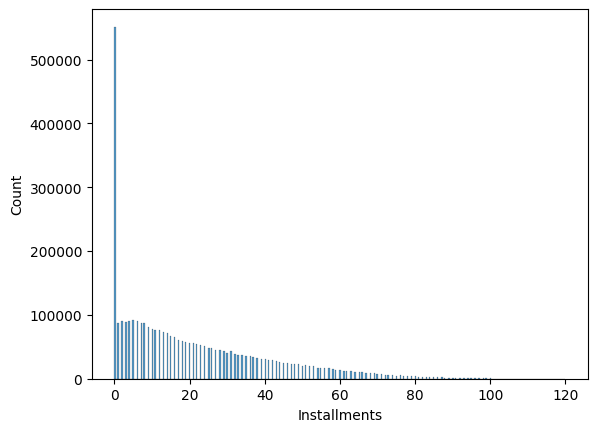

In [73]:
credit_card_df['CNT_INSTALMENT_MATURE_CUM'] = credit_card_df['CNT_INSTALMENT_MATURE_CUM'].astype(np.float64)
sns.histplot(x='CNT_INSTALMENT_MATURE_CUM', data=credit_card_df)
plt.xlabel('Installments')
plt.show()

### Insights 
1- about 80 percent of Installments is lower than 80 and the range of Installments between 0 and 120 

### I stoped Doing Feature Engineering Here As It need more time to invistigate all the files 
### But I think we can Find some important features in bureau and bureau_balance file 

## preparing model for Deployment

In [74]:
# function take user and its feature and output IF he is high risk or low risk 
def predict_new_user(model, feature_values):
    feature_values["RATE_OF_LOAN"]=feature_values["AMT_ANNUITY"]/feature_values["AMT_CREDIT"]
    
    feature_values["AMT_INCOME_TOTAL"]=np.log(feature_values["AMT_INCOME_TOTAL"])
    feature_values["AMT_CREDIT"]=np.log(feature_values["AMT_CREDIT"])
    feature_values["AMT_ANNUITY"]=np.log(feature_values["AMT_ANNUITY"])
    feature_values["AMT_GOODS_PRICE"]=np.log(feature_values["AMT_GOODS_PRICE"])
    
    # Ensure the feature values are provided in the correct order
    expected_features = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'FLAG_OWN_CAR','FLAG_OWN_REALTY',"NAME_INCOME_TYPE",
                    "REG_CITY_NOT_WORK_CITY",
                     'CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE_YEARS',
                    'YEARS_EMPLOYED','YEARS_REGISTRATION',
                   'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',"RATE_OF_LOAN"]
    # Create a DataFrame for the single instance
    input_df = pd.DataFrame([feature_values], columns=expected_features)
    
    # Predict using the model
    pred_prob = model.predict_proba(input_df)[0]
    print("Probabilty of Not Rapaying ",pred_prob[1])
    # Determine risk category based on the predicted probability
    risk_category = "Low Risk" if pred_prob[-1] < 0.2 else "High Risk"
    return risk_category

### test with only one user 

In [75]:
# Example of how to use the function
features_pred = {
    'CODE_GENDER': "M", 
    'NAME_EDUCATION_TYPE': "Higher education", 
    'FLAG_OWN_CAR': 1, 
    'FLAG_OWN_REALTY': 1, 
    'NAME_INCOME_TYPE': "Working",
    'REG_CITY_NOT_WORK_CITY': 0, 
    'CNT_CHILDREN': 2, 
    'AMT_INCOME_TOTAL': 1200, 
    'AMT_CREDIT': 3000, 
    'AMT_ANNUITY': 20243,
    'AMT_GOODS_PRICE': 98798, 
    'AGE_YEARS': 60, 
    'YEARS_EMPLOYED': 20, 
    'YEARS_REGISTRATION': 2,
    'EXT_SOURCE_1': 0.6, 
    'EXT_SOURCE_2': 0.3, 
    'EXT_SOURCE_3': 0.2

}

# Assuming `bst` is your trained LightGBM model loaded elsewhere in your code
risk_status = predict_new_user(model, features_pred)
print("Risk Status:", risk_status)

Probabilty of Not Rapaying  0.11375408
Risk Status: Low Risk


## 4- Save model 

In [76]:
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)